# #0 Table of Content
1. Import packages and data
2. Data cleanse
3. r
4. r
5. f

# #1 Import packages, data and creating functions

In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
review_table   = pd.read_csv("../asset/etlReview.csv")
user_table   = pd.read_csv("../asset/etlUser.csv")
product_table = pd.read_csv("../asset/etlProduct.csv")

In [3]:
review_table

,review_id,username,product_id,date,rating,content,location
0,6ef347c0-c603-422a-b8d1-c4b96bed0207,i*****b,912d838b-5e84-4aef-a0dd-bb23f44e5913,2023-09-02 01:13:00,5,Best buy ever\r\nit looks great works great\r\...,NaN
1,af3ccbed-1865-4492-88e3-723e9dda0de9,jessylim70,912d838b-5e84-4aef-a0dd-bb23f44e5913,2023-07-21 23:33:00,5,Item received in good condition.\r\nBought dur...,NaN
2,d17ebe72-919d-4c2a-a230-88119aac725c,s*****b,912d838b-5e84-4aef-a0dd-bb23f44e5913,2023-05-08 19:37:00,5,Value For Money: yes\r\nBest Feature(s): comfo...,NaN
3,9b72986c-7525-425e-89c6-e27d7e18af50,a*****w,912d838b-5e84-4aef-a0dd-bb23f44e5913,2023-06-13 11:03:00,5,Impressed with the quality and looks really ni...,NaN
4,3af89ba2-29c8-4adb-bb3a-cf9dd3ef2255,j*****n,912d838b-5e84-4aef-a0dd-bb23f44e5913,2023-10-06 12:56:00,5,Value For Money: yes\r\nBest Feature(s): the w...,NaN
...,...,...,...,...,...,...,...
155248,6d9aedbd-acf4-43c3-aefc-6a7eae22387b,nnumbs,e634b9ba-08e3-4d00-997b-ee4a3437b448,2021-08-05 11:38:00,5,NaN,NaN
155249,5a7c4ed5-a77d-4c77-92da-633f20147265,yld7zt3fab,e634b9ba-08e3-4d00-997b-ee4a3437b448,2021-11-14 08:31:00,5,NaN,NaN
155250,3864b6fe-2dde-4ebf-a7d9-4ab2ab54e53e,elischan93,8d69cbbc-7c81-41fd-8414-fc22895f3f6b,2023-05-03 20:43:00,5,Value For Money: yes\r\nBest Feature(s): Nice ...,NaN
155251,dca0ff22-40cf-48fc-a222-cf30d5e00388,yxfxrblqz5,8d69cbbc-7c81-41fd-8414-fc22895f3f6b,2023-03-25 18:24:00,5,Value For Money: song system is good .buy again,NaN


In [4]:
def pre_process(text):
    # remove self-generated words
    text = re.sub('Value For Money','', str(text))
    text = re.sub('Best Feature\(s\)','', text)
    text = re.sub('Performance: ','', text)

    # remove characters that are not a-zA-z
    text = re.sub('[^a-zA-Z]+',' ', text)
    
    # change all to lowercase
    text=text.lower()

    # remove category
    text = re.sub('mouse','', text)
    text = re.sub('speaker','', text)
    text = re.sub('headphone','', text)
    text = re.sub('keyboard','', text)
    text = re.sub('monitor','', text)
    
    return str(text)

def sentiment_score(contents):
    sia = SentimentIntensityAnalyzer()
    sentiment_list = []
    custom_lexicon = {
        'but': -1,
        'nice': 2,
        'solid': 2,
        'well': 2,
        'fast': 2,
        'ok': 0.5,
        'no': -2,
        'worst': -2   
    }
    
    sia.lexicon.update(custom_lexicon)

    for content in contents:
        if content != 'nan':
            sentiment_dict = sia.polarity_scores(content)

            if sentiment_dict['pos'] != 0 and sentiment_dict['compound'] >= 0.3 or sentiment_dict['compound'] >= 0.3:
                #print(sentiment_dict)
                sentiment_list.append("Positive")
                
            elif sentiment_dict['neg'] != 0 and sentiment_dict['compound'] < 0.3 or sentiment_dict['compound'] < 0.3:
                #print(sentiment_dict)
                #print("neg: ", content)
                sentiment_list.append("Negative")
            else :
                print('error')
                #sentiment_list.append("Neutral")
                #print(sentiment_dict)
                #print("Neutral: ", content)
        else:
            sentiment_list.append(np.nan)
            
    return sentiment_list

def keyword_extraction(content, sentiment_vector_df):
    words = content.split()
    
    values = []
    added_words = set()
    
    for word in words:
        if word in sentiment_vector_df.columns:
            if word not in added_words:
                value = sentiment_vector_df[word].values[0]
                values.append((word, value))
                added_words.add(word)
    
    sorted_values = sorted(values, key=lambda x: x[1])
    
    highest_values = sorted_values[-3:]

    highest_values = [t[0] for t in highest_values]
    return highest_values

In [5]:
seo_stopwords = [
    "A", "ABOUT", "ACTUALLY", "ALMOST", "ALSO", "ALTHOUGH", "ALWAYS", "AM", "AN", "AND", "ANY", "ARE", "AS", "AT",
    "BE", "BECAME", "BECOME", "BY", "CAN", "CAME", "COULD", "DAYS", "DID", "DO", "DOES", "EACH", "EITHER", "ELSE", "FOR",
    "FROM", "HAD", "HAS", "HAVE", "I", "IF", "IN", "IS", "IT", "ITS", "JUST", "MAY", "LIGHT", "MAYBE", "ME",
    "MIGHT", "MINE", "MUST", "MY", "NEITHER", "NOR", "NOT", "OF", "OH", "OK", "QUITE", "STILL", "SURE", "TEST", "TRY", "WHEN", "WHERE", "WHEREVER",
    "WHENEVER", "WHETHER", "WHICH", "WHILE", "WHO", "WHOM", "WHOEVER", "WHOSE", "WHY", "WILL", "WITH", "WITHIN",
    "WITHOUT", "WOULD", "YET", "YOU", "YOUR", "YEA", "YUP", "TQ", "TY", "THANKS", "GET", "GO", "GOT"
]

seo_stopwords = [word.lower() for word in seo_stopwords]

stopwords = stopwords.words('english')
stopwords.extend(seo_stopwords)

# #2 Cleanse the text data and get sentiment scores

In this section, the following tasks will be performed:
- Cleanse the data using the func pre_process(x) defined above.
- Add a new column 'cleansed_content' into the review_table
- Get the sentiment score for all reviews
- Add a new column 'sentiment' into the review_table
- Display the overall positive and negative reviews across all products in a Pie Chart

In [6]:
contents_all = review_table['content'].apply(lambda x:pre_process(x))
review_table['cleansed_content'] = contents_all
contents_all

0         best buy ever it looks great works great the s...
1         item received in good condition bought during ...
2          yes comfortable to wear good received very fa...
3         impressed with the quality and looks really ni...
4          yes the weight good excited to try the perfor...
                                ...                        
155248                                                  nan
155249                                                  nan
155250     yes nice bass great seller is very patient an...
155251                        song system is good buy again
155252                                                  nan
Name: content, Length: 155253, dtype: object

In [7]:
sentiment_pd = pd.DataFrame(sentiment_score(contents_all),columns=['sentiment'])
review_table = pd.concat([review_table, sentiment_pd], axis = 1)

In [8]:
review_table

,review_id,username,product_id,date,rating,content,location,cleansed_content,sentiment
0,6ef347c0-c603-422a-b8d1-c4b96bed0207,i*****b,912d838b-5e84-4aef-a0dd-bb23f44e5913,2023-09-02 01:13:00,5,Best buy ever\r\nit looks great works great\r\...,NaN,best buy ever it looks great works great the s...,Positive
1,af3ccbed-1865-4492-88e3-723e9dda0de9,jessylim70,912d838b-5e84-4aef-a0dd-bb23f44e5913,2023-07-21 23:33:00,5,Item received in good condition.\r\nBought dur...,NaN,item received in good condition bought during ...,Positive
2,d17ebe72-919d-4c2a-a230-88119aac725c,s*****b,912d838b-5e84-4aef-a0dd-bb23f44e5913,2023-05-08 19:37:00,5,Value For Money: yes\r\nBest Feature(s): comfo...,NaN,yes comfortable to wear good received very fa...,Positive
3,9b72986c-7525-425e-89c6-e27d7e18af50,a*****w,912d838b-5e84-4aef-a0dd-bb23f44e5913,2023-06-13 11:03:00,5,Impressed with the quality and looks really ni...,NaN,impressed with the quality and looks really ni...,Positive
4,3af89ba2-29c8-4adb-bb3a-cf9dd3ef2255,j*****n,912d838b-5e84-4aef-a0dd-bb23f44e5913,2023-10-06 12:56:00,5,Value For Money: yes\r\nBest Feature(s): the w...,NaN,yes the weight good excited to try the perfor...,Positive
...,...,...,...,...,...,...,...,...,...
155248,6d9aedbd-acf4-43c3-aefc-6a7eae22387b,nnumbs,e634b9ba-08e3-4d00-997b-ee4a3437b448,2021-08-05 11:38:00,5,NaN,NaN,nan,NaN
155249,5a7c4ed5-a77d-4c77-92da-633f20147265,yld7zt3fab,e634b9ba-08e3-4d00-997b-ee4a3437b448,2021-11-14 08:31:00,5,NaN,NaN,nan,NaN
155250,3864b6fe-2dde-4ebf-a7d9-4ab2ab54e53e,elischan93,8d69cbbc-7c81-41fd-8414-fc22895f3f6b,2023-05-03 20:43:00,5,Value For Money: yes\r\nBest Feature(s): Nice ...,NaN,yes nice bass great seller is very patient an...,Positive
155251,dca0ff22-40cf-48fc-a222-cf30d5e00388,yxfxrblqz5,8d69cbbc-7c81-41fd-8414-fc22895f3f6b,2023-03-25 18:24:00,5,Value For Money: song system is good .buy again,NaN,song system is good buy again,Positive


In [9]:
review_table['sentiment'].value_counts()

sentiment
Positive    70310
Negative    11687
Name: count, dtype: int64

In [10]:
review_table.shape

(155253, 9)

In [11]:
review_table['content'].isna().sum()

73256

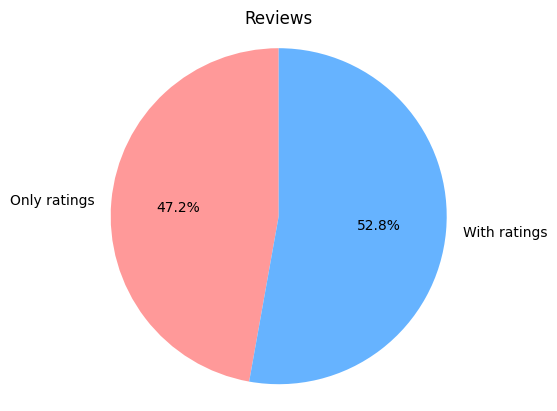

In [12]:
content_nan_counts = review_table['content'].isna().sum()
content_counts = review_table['content'].count()

sentiment_df = pd.DataFrame({'sentiment': [0,1], 'count': [content_nan_counts, content_counts]})

labels = ['Only ratings', 'With ratings']
sizes = [sentiment_df['count'][0], sentiment_df['count'][1]]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('Reviews')
plt.show()

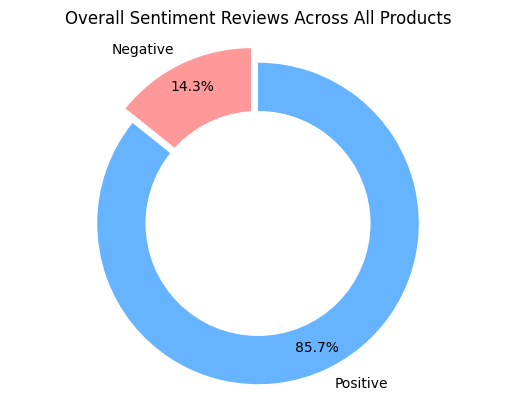

In [13]:
sentiment_counts = review_table['sentiment'].value_counts()

sentiment_df = pd.DataFrame({'sentiment': sentiment_counts.index, 'count': sentiment_counts.values})

labels = ['Negative', 'Positive']
sizes = [sentiment_df['count'][1], sentiment_df['count'][0]]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
ax1.axis('equal')

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Overall Sentiment Reviews Across All Products')
plt.show()

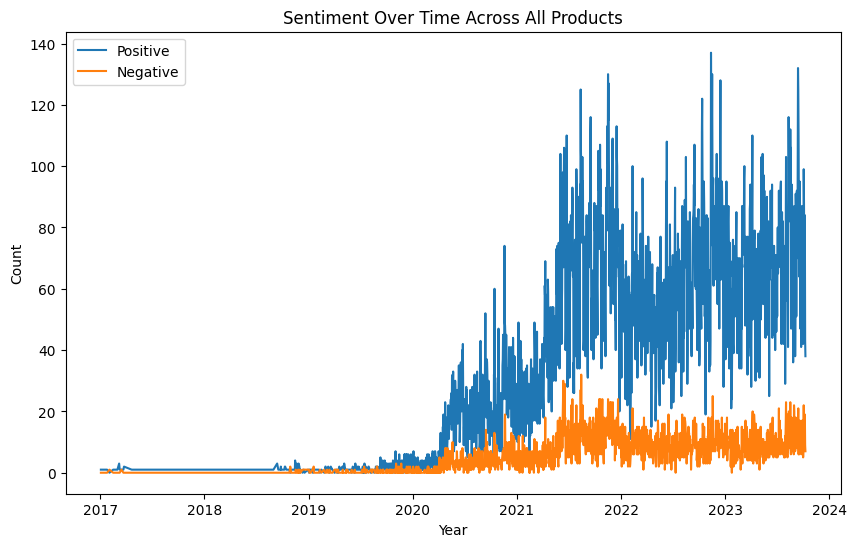

In [14]:
review_table['date'] = pd.to_datetime(review_table['date'])

# Group and aggregate the data by day
daily_sentiment_counts = review_table.groupby([review_table['date'].dt.date, 'sentiment']).size().unstack(fill_value=0)

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment_counts.index, daily_sentiment_counts['Positive'], label='Positive')
plt.plot(daily_sentiment_counts.index, daily_sentiment_counts['Negative'], label='Negative')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sentiment Over Time Across All Products')
plt.legend()

# Display the plot
plt.show()

# #3 Transform the text data: TF-IDF

# TESTING OF CODES

In [15]:
product_content_df = review_table.groupby(['product_id', 'sentiment'])['cleansed_content'].apply(list).reset_index()
product_content_df

,product_id,sentiment,cleansed_content
0,00ca38b7-8d71-4a14-8ff3-2e3502c740d3,Negative,[ ok ok fits bluetooth works and optional aux ...
1,00ca38b7-8d71-4a14-8ff3-2e3502c740d3,Positive,[ below for jbl yup connect fast sound is good...
2,013ebc59-8967-493f-a620-c840559f366a,Negative,[no fuss in order and delivery very fast deliv...
3,013ebc59-8967-493f-a620-c840559f366a,Positive,[good light n good yes order received in order...
4,0159ab5f-9ea3-4b64-9d21-ac0f323782a5,Negative,[amazingly smooth all of it need i say more th...
...,...,...,...
995,fe0e0859-15fd-4a47-a04d-9c9bd47f44d1,Negative,[a very silence it work juz as it said tried ...
996,fe0e0859-15fd-4a47-a04d-9c9bd47f44d1,Positive,[ ok excellent good ordered during the weekend...
997,ff5107ac-cf8f-4785-ba92-74e2788e5640,Positive,[ was easy to fix together and it works very w...
998,ffd204e4-8711-489a-9ca6-0796527b776f,Negative,[the back light is very dim even at highest le...


In [12]:
product_content_df['sentiment'].value_counts()

sentiment
Positive    535
Negative    465
Name: count, dtype: int64

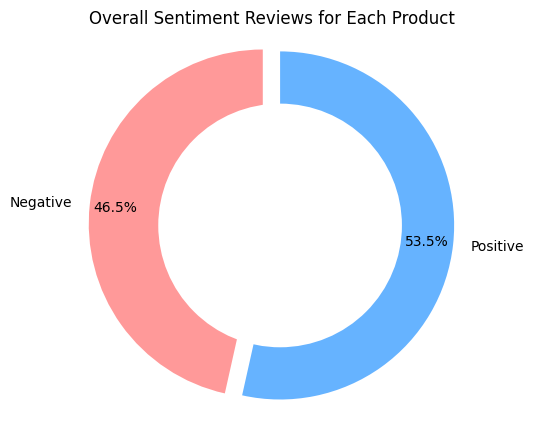

In [25]:
# Count the occurrences of each sentiment
sentiment_counts = product_content_df['sentiment'].value_counts()

# Create a DataFrame for the chart
sentiment_df = pd.DataFrame({'sentiment': sentiment_counts.index, 'count': sentiment_counts.values})

# Create a donut chart
labels = ['Negative', 'Positive']
sizes = [sentiment_df['count'][1], sentiment_df['count'][0]]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the first slice (Negative)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a circle in the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add a title
plt.title('Overall Sentiment Reviews for Each Product')

# Display the chart
plt.show()

In [15]:
#product_content_df = pd.DataFrame(user_sentiments)

product_content_df['cleansed_content'] = product_content_df['cleansed_content'].apply(lambda x: ' '.join(x))
product_content_df['cleansed_content'] = product_content_df['cleansed_content'].apply(lambda x: x.replace('nan', '').strip())
product_content_df

,product_id,sentiment,cleansed_content
0,00ca38b7-8d71-4a14-8ff3-2e3502c740d3,Negative,ok ok fits bluetooth works and optional aux co...
1,00ca38b7-8d71-4a14-8ff3-2e3502c740d3,Positive,below for jbl yup connect fast sound is good g...
2,013ebc59-8967-493f-a620-c840559f366a,Negative,no fuss in order and delivery very fast delive...
3,013ebc59-8967-493f-a620-c840559f366a,Positive,good light n good yes order received in order ...
4,0159ab5f-9ea3-4b64-9d21-ac0f323782a5,Negative,amazingly smooth all of it need i say more thi...
...,...,...,...
995,fe0e0859-15fd-4a47-a04d-9c9bd47f44d1,Negative,a very silence it work juz as it said tried t...
996,fe0e0859-15fd-4a47-a04d-9c9bd47f44d1,Positive,ok excellent good ordered during the weekend r...
997,ff5107ac-cf8f-4785-ba92-74e2788e5640,Positive,was easy to fix together and it works very wel...
998,ffd204e4-8711-489a-9ca6-0796527b776f,Negative,the back light is very dim even at highest lev...


In [16]:
group_sentiment = product_content_df.groupby('sentiment')['cleansed_content'].apply(list)
group_sentiment = pd.DataFrame(group_sentiment)
group_sentiment['cleansed_content'] = group_sentiment['cleansed_content'].apply(lambda x: ' '.join(x))
group_sentiment

,cleansed_content
sentiment,
Negative,ok ok fits bluetooth works and optional aux co...
Positive,below for jbl yup connect fast sound is good g...


In [17]:
neg = group_sentiment.iloc[0].apply(lambda x: x.replace('good', '').strip())
pos = group_sentiment.iloc[1].apply(lambda x: x.replace('bad', '').strip())

neg_content = neg['cleansed_content']
pos_content = pos['cleansed_content']

neg_tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords)
pos_tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords)

neg_tfidf_matrix = neg_tfidf_vectorizer.fit_transform([neg_content])
pos_tfidf_matrix = pos_tfidf_vectorizer.fit_transform([pos_content])

neg_tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
pos_tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)

neg_reviews_tfidf = neg_tfidf_transformer.fit_transform(neg_tfidf_matrix)
pos_reviews_tfidf = pos_tfidf_transformer.fit_transform(pos_tfidf_matrix)

neg_feature_names = neg_tfidf_vectorizer.get_feature_names_out()
pos_feature_names = pos_tfidf_vectorizer.get_feature_names_out()

neg_vector_df = pd.DataFrame(neg_reviews_tfidf.toarray(), columns=neg_feature_names)
pos_vector_df = pd.DataFrame(pos_reviews_tfidf.toarray(), columns=pos_feature_names)

# WORD CLOUD FOR FEATURE NAMES
neg_max_value = neg_reviews_tfidf.max(axis=0).toarray().ravel()
pos_max_value = pos_reviews_tfidf.max(axis=0).toarray().ravel()

sorted_by_neg_tfidf = neg_max_value.argsort()
sorted_by_pos_tfidf = pos_max_value.argsort()

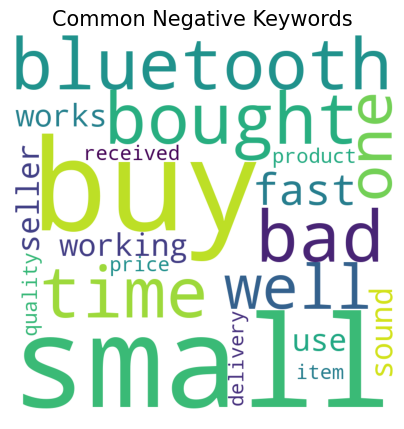

In [18]:
plt.rcParams['figure.figsize'] = (5, 5)
wordcloud = WordCloud(background_color = 'white', width = 800,  height = 800, max_words = 20).generate(' '.join(neg_feature_names[sorted_by_neg_tfidf[-20:]]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Common Negative Keywords',fontsize = 15)
plt.show()

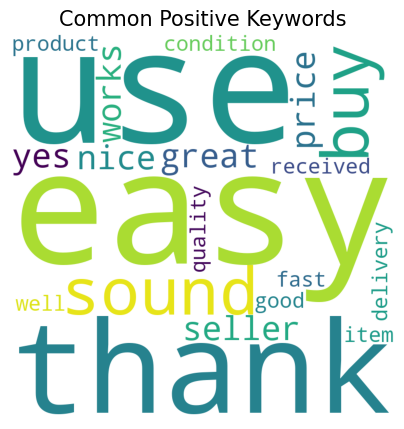

In [19]:
plt.rcParams['figure.figsize'] = (5, 5)
wordcloud = WordCloud(background_color = 'white', width = 800,  height = 800, max_words = 20).generate(' '.join(pos_feature_names[sorted_by_pos_tfidf[-20:]]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Common Positive Keywords',fontsize = 15)
plt.show()

In [20]:
keywords_dict = {}

for index, row in product_content_df.iterrows():
    product_id = row['product_id']
    sentiment = row['sentiment']
    cleansed_content = row['cleansed_content']
    
    if product_id not in keywords_dict:
        keywords_dict[product_id] = {}
        
    if sentiment == 'Positive':
        keywords_dict[product_id]['positive_keywords'] = keyword_extraction(cleansed_content, pos_vector_df)
        
    elif sentiment == 'Negative':      
        keywords_dict[product_id]['negative_keywords'] = keyword_extraction(cleansed_content, neg_vector_df)
        
keywords_dict

{'00ca38b7-8d71-4a14-8ff3-2e3502c740d3': {'negative_keywords': ['sound',
   'quality',
   'price'],
  'positive_keywords': ['quality', 'fast', 'good']},
 '013ebc59-8967-493f-a620-c840559f366a': {'negative_keywords': ['item',
   'received',
   'delivery'],
  'positive_keywords': ['fast', 'delivery', 'good']},
 '0159ab5f-9ea3-4b64-9d21-ac0f323782a5': {'negative_keywords': ['price',
   'item',
   'received'],
  'positive_keywords': ['fast', 'delivery', 'good']},
 '01b30890-2332-4c22-8a8b-9ee7e0ac4b16': {'negative_keywords': ['advertised'],
  'positive_keywords': ['fast', 'delivery', 'good']},
 '0233d7c9-8596-4e9e-9a7e-0dd09025a0dd': {'negative_keywords': ['looks',
   'bad',
   'quality'],
  'positive_keywords': ['well', 'delivery', 'good']},
 '03123f5a-2719-40cd-b5ec-d78f6e1c2e84': {'negative_keywords': ['item',
   'received',
   'delivery'],
  'positive_keywords': ['fast', 'delivery', 'good']},
 '0389bc1a-310b-4567-b2be-743840c4c4e3': {'negative_keywords': ['week',
   'used',
   'took'],

In [21]:
top3_keywords_list = [{'product_id': product_id, **word_data} for product_id, word_data in keywords_dict.items()]

top3_keywords_df = pd.DataFrame(top3_keywords_list)

top3_keywords_df

,product_id,negative_keywords,positive_keywords
0,00ca38b7-8d71-4a14-8ff3-2e3502c740d3,"[sound, quality, price]","[quality, fast, good]"
1,013ebc59-8967-493f-a620-c840559f366a,"[item, received, delivery]","[fast, delivery, good]"
2,0159ab5f-9ea3-4b64-9d21-ac0f323782a5,"[price, item, received]","[fast, delivery, good]"
3,01b30890-2332-4c22-8a8b-9ee7e0ac4b16,[advertised],"[fast, delivery, good]"
4,0233d7c9-8596-4e9e-9a7e-0dd09025a0dd,"[looks, bad, quality]","[well, delivery, good]"
...,...,...,...
540,fd990a19-2a9c-4140-9ac1-79df63384b68,"[item, received, delivery]","[fast, delivery, good]"
541,fdcfed58-7221-4308-b4f3-1ea69d467301,"[working, received, delivery]","[fast, delivery, good]"
542,fe0e0859-15fd-4a47-a04d-9c9bd47f44d1,"[use, price, item]","[fast, delivery, good]"
543,ff5107ac-cf8f-4785-ba92-74e2788e5640,NaN,"[fast, delivery, good]"


In [22]:
product_table

,product_id,category,merchant_id,name,avg_rating,total_rating,total_sold,price,qty_avail,fav_count,img_src,description
0,912d838b-5e84-4aef-a0dd-bb23f44e5913,headphone,983b8576-0dd8-4c84-acdf-0915734adbd0,SPRISE Premium Wireless Bluetooth Earphone Col...,4.6,256,840,17.39,459,1100,https://down-sg.img.susercontent.com/file/my-1...,Hey~ Welcome to SPRISE Official Store! Please ...
1,34bb8bfe-e134-41af-a487-3b8d4ce6fff0,headphone,6e3b6c48-c873-44ac-b99a-845f35a30cf7,Rock Space [SG] O2 Wireless Headphone Bluetoot...,4.9,369,955,35.80,164,1800,https://down-sg.img.susercontent.com/file/sg-1...,SKU: 2856 Name: Rock Space 02 Wireless Headpho...
2,35ff0f3c-8a06-4e33-a789-319ff793220d,headphone,90f139bf-4bb4-4f5c-8511-f99ede1d71b2,Edifier W820NB/W820NB PLUS Wireless Headphone ...,4.8,88,259,79.99,329,466,https://down-sg.img.susercontent.com/file/cn-1...,EDIFIER W820NB PLUS NOISE CANCELING ACTIVE NOI...
3,33cfcddf-a606-4d60-8d78-5926aee333ac,headphone,983b8576-0dd8-4c84-acdf-0915734adbd0,SPRISE Stereo USB Headset Rotating Mic Earphon...,4.9,60,142,12.85,58,81,no_src,Hey~ Welcome to SPRISE Official Store! Please ...
4,58b2475a-2ba2-4404-b9b5-35a633c76462,headphone,355137ee-5cdc-46f9-a573-c4e6a6cbe5f5,USB PC Headset Conference Call with Noise Canc...,4.9,1600,5100,18.50,478,1500,no_src,Headset Key Features: ✅ High Quality Stereo S...
...,...,...,...,...,...,...,...,...,...,...,...,...
587,6614655f-4e19-4a09-bf0c-9e147817aebf,speaker,814b9f15-dacf-4a5b-92ee-6117a7174df5,Muzen MW-PVX Wild Mini Outdoor Portable Speake...,4.8,39,67,89.00,16,320,https://down-sg.img.susercontent.com/file/cn-1...,"If you can read Chinese, you can download Ohpl..."
588,1230caa9-a28e-4178-9dbc-d0d9f39b928e,speaker,358eafab-6a5f-4a70-a4f1-7e4e7c90c4e0,Portable Cool And Cute Bluetooth Speaker,0.0,0,0,16.80,16,2,no_src,"1.Bluetooth Speaker, MIC inside, handsfree fun..."
589,8b1afcc4-2522-48fb-8e1a-0a186525d692,speaker,a28722b6-b41e-43d2-a9f7-3f3fc0e50a6b,Aukey SP-A8 Stream CyberTalk Bluetooth Confere...,5.0,4,19,129.90,1,47,no_src,Highlights\n\n-Dual-speaker HD audio\n-Dual-mi...
590,e634b9ba-08e3-4d00-997b-ee4a3437b448,speaker,def85fb4-073d-4b68-b22e-5dc4cf2f0521,Retro Vintage Radio Super Bass FM Radio Bamboo...,4.8,61,130,43.93,28,329,https://down-sg.img.susercontent.com/file/f833...,Package includes: 1 x multimedia speaker 1 x i...


In [23]:
product_table = product_table.merge(top3_keywords_df, on='product_id', how='left')
product_table

,product_id,category,merchant_id,name,avg_rating,total_rating,total_sold,price,qty_avail,fav_count,img_src,description,negative_keywords,positive_keywords
0,912d838b-5e84-4aef-a0dd-bb23f44e5913,headphone,983b8576-0dd8-4c84-acdf-0915734adbd0,SPRISE Premium Wireless Bluetooth Earphone Col...,4.6,256,840,17.39,459,1100,https://down-sg.img.susercontent.com/file/my-1...,Hey~ Welcome to SPRISE Official Store! Please ...,"[price, item, delivery]","[fast, delivery, good]"
1,34bb8bfe-e134-41af-a487-3b8d4ce6fff0,headphone,6e3b6c48-c873-44ac-b99a-845f35a30cf7,Rock Space [SG] O2 Wireless Headphone Bluetoot...,4.9,369,955,35.80,164,1800,https://down-sg.img.susercontent.com/file/sg-1...,SKU: 2856 Name: Rock Space 02 Wireless Headpho...,"[item, received, delivery]","[fast, delivery, good]"
2,35ff0f3c-8a06-4e33-a789-319ff793220d,headphone,90f139bf-4bb4-4f5c-8511-f99ede1d71b2,Edifier W820NB/W820NB PLUS Wireless Headphone ...,4.8,88,259,79.99,329,466,https://down-sg.img.susercontent.com/file/cn-1...,EDIFIER W820NB PLUS NOISE CANCELING ACTIVE NOI...,"[buy, sound, price]","[fast, delivery, good]"
3,33cfcddf-a606-4d60-8d78-5926aee333ac,headphone,983b8576-0dd8-4c84-acdf-0915734adbd0,SPRISE Stereo USB Headset Rotating Mic Earphon...,4.9,60,142,12.85,58,81,no_src,Hey~ Welcome to SPRISE Official Store! Please ...,"[purchase, fine, works]","[fast, delivery, good]"
4,58b2475a-2ba2-4404-b9b5-35a633c76462,headphone,355137ee-5cdc-46f9-a573-c4e6a6cbe5f5,USB PC Headset Conference Call with Noise Canc...,4.9,1600,5100,18.50,478,1500,no_src,Headset Key Features: ✅ High Quality Stereo S...,"[item, received, delivery]","[fast, delivery, good]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,6614655f-4e19-4a09-bf0c-9e147817aebf,speaker,814b9f15-dacf-4a5b-92ee-6117a7174df5,Muzen MW-PVX Wild Mini Outdoor Portable Speake...,4.8,39,67,89.00,16,320,https://down-sg.img.susercontent.com/file/cn-1...,"If you can read Chinese, you can download Ohpl...","[works, sound, product]","[fast, delivery, good]"
588,1230caa9-a28e-4178-9dbc-d0d9f39b928e,speaker,358eafab-6a5f-4a70-a4f1-7e4e7c90c4e0,Portable Cool And Cute Bluetooth Speaker,0.0,0,0,16.80,16,2,no_src,"1.Bluetooth Speaker, MIC inside, handsfree fun...",NaN,NaN
589,8b1afcc4-2522-48fb-8e1a-0a186525d692,speaker,a28722b6-b41e-43d2-a9f7-3f3fc0e50a6b,Aukey SP-A8 Stream CyberTalk Bluetooth Confere...,5.0,4,19,129.90,1,47,no_src,Highlights\n\n-Dual-speaker HD audio\n-Dual-mi...,NaN,"[fast, delivery, good]"
590,e634b9ba-08e3-4d00-997b-ee4a3437b448,speaker,def85fb4-073d-4b68-b22e-5dc4cf2f0521,Retro Vintage Radio Super Bass FM Radio Bamboo...,4.8,61,130,43.93,28,329,https://down-sg.img.susercontent.com/file/f833...,Package includes: 1 x multimedia speaker 1 x i...,"[sound, quality, received]","[fast, delivery, good]"


In [24]:
product_table.to_csv("../asset/topwordsProduct.csv", index=False)

# #References

In [112]:
user_review_table = user_table.merge(review_table)
user_sentiments = user_review_table.groupby('username').apply(lambda x: x['sentiment'].values.tolist()).reset_index(name='sentiment_list')
user_contents = user_review_table.groupby('username').apply(lambda x: x['cleansed_content'].values.tolist()).reset_index(name='content_list')
user_contents_sentiments = user_sentiments.merge(user_contents)


In [111]:
positive_reviews = []
negative_reviews = []

for index, row in user_contents_sentiments.iterrows():
    username = row['username']
    user_sentiments = row['sentiment_list']
    user_reviews = row['content_list']

    # Find 'positive' sentiments and extract corresponding reviews
    positive_reviews.append({
        'username': username,
        'positive_reviews': [user_reviews[i] for i, sentiment in enumerate(user_sentiments) if sentiment == 'Positive']
    })

    negative_reviews.append({
        'username': username,
        'negative_reviews': [user_reviews[i] for i, sentiment in enumerate(user_sentiments) if sentiment == 'Negative']
    })
    
# Create a new DataFrame with the results
positive_reviews_df = pd.DataFrame(positive_reviews)
negative_reviews_df = pd.DataFrame(negative_reviews)

positive_reviews_df['positive_reviews'] = positive_reviews_df['positive_reviews'].apply(lambda x: ' '.join(x))
negative_reviews_df['negative_reviews'] = negative_reviews_df['negative_reviews'].apply(lambda x: ' '.join(x))

pos_neg_reviews = positive_reviews_df.merge(negative_reviews_df)
pos_neg_reviews

,username,positive_reviews,negative_reviews
0,.*****.,the f keys on top and volume buttons don t wor...,
1,.*****9,,
2,.*****_,,
3,.*****f,very fast delivery seller included pin plug ap...,
4,.*****n,item well received not a critic for sound qual...,
...,...,...,...
80262,zzzhenling,,
80263,zzzjj.e,,
80264,zzzkelzel,,
80265,zzzmonsterz,,


In [9]:
# Download the English stopwords file
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rache\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
